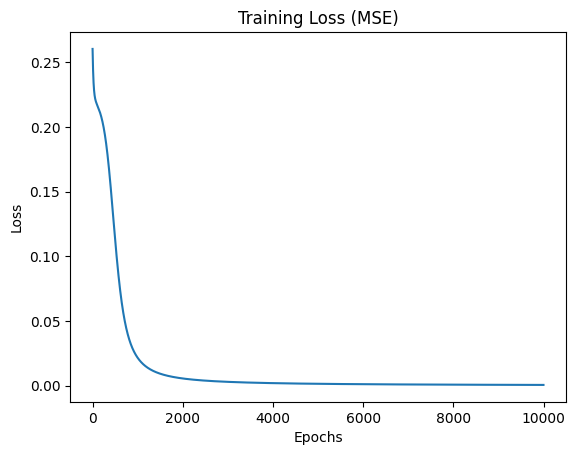

True: A, Predicted: A


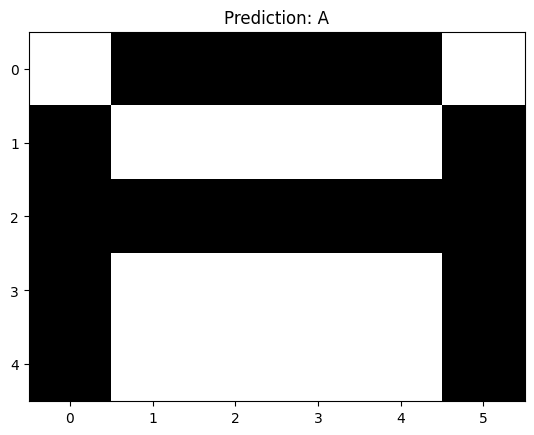

True: B, Predicted: B


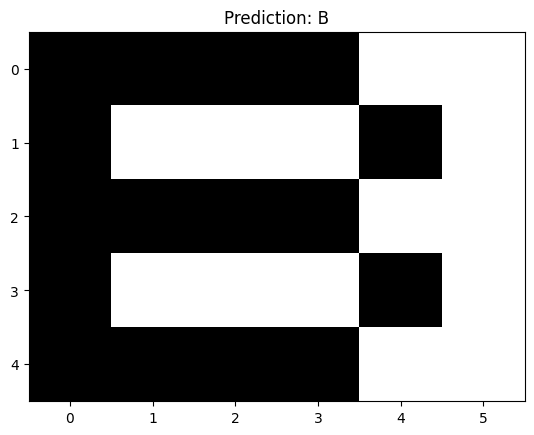

True: C, Predicted: C


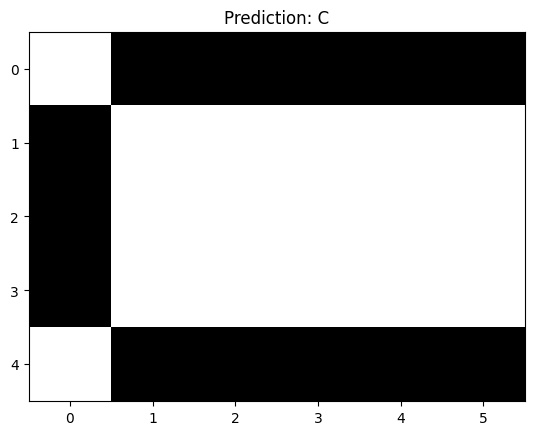

In [19]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def one_hot_to_label(o):
    return np.argmax(o)

A = np.array([
    [0,1,1,1,1,0],
    [1,0,0,0,0,1],
    [1,1,1,1,1,1],
    [1,0,0,0,0,1],
    [1,0,0,0,0,1]
]).flatten()

B = np.array([
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0],
    [1,0,0,0,1,0],
    [1,1,1,1,0,0]
]).flatten()

C = np.array([
    [0,1,1,1,1,1],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [1,0,0,0,0,0],
    [0,1,1,1,1,1]
]).flatten()

X = np.array([A, B, C])
y = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
])

np.random.seed(1)
input_size = 30
hidden_size = 10
output_size = 3
lr = 0.1
epochs = 10000
batch_size = X.shape[0]

W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

losses = []

for epoch in range(epochs):
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    error = y - a2
    loss = np.mean(np.square(error))
    losses.append(loss)
    d_output = error * sigmoid_derivative(a2)
    d_hidden = d_output @ W2.T * sigmoid_derivative(a1)
    W2 += (a1.T @ d_output) * lr / batch_size
    b2 += np.sum(d_output, axis=0, keepdims=True) * lr / batch_size
    W1 += (X.T @ d_hidden) * lr / batch_size
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * lr / batch_size

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss (MSE)")
plt.show()

def predict(image):
    z1 = image @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)
    return one_hot_to_label(a2)

for i, img in enumerate(X):
    pred = predict(img)
    print(f"True: {['A','B','C'][i]}, Predicted: {['A','B','C'][pred]}")
    plt.imshow(img.reshape(5,6), cmap='gray_r')
    plt.title(f"Prediction: {['A','B','C'][pred]}")
    plt.axis('auto')
    plt.show()
